In [115]:
%pip install matplotlib
%pip install japanize-matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn
import collections
import math
import statistics
import requests
import io
import japanize_matplotlib
from cProfile import label
from cmath import log, log10
from distutils.log import Log
from tkinter import font

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# データの読み込みと前処理

In [116]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.reset_option('display.float_format')
pd.options.display.float_format = '{:.5f}'.format

In [128]:
url1="https://raw.githubusercontent.com/Icchi-Koza/private-data/main/figure3_stock-code.csv?token=GHSAT0AAAAAABWAS7ZSGE3O3NJAT2XPD7QWYWB2XWQ"
url2="https://raw.githubusercontent.com/Icchi-Koza/private-data/main/figure3.csv?token=GHSAT0AAAAAABWAS7ZTJPZ4J5VPAUOUVSRKYWB2Y6Q"
dat1=pd.read_csv(url1,encoding='cp932')
dat2=pd.read_csv(url2,encoding='cp932')

In [129]:
col1=dat1.columns.tolist()
col2=dat2.columns.tolist()
List1=[i for i in col1 if i in col2]
dat=pd.merge(dat1,dat2, on=List1, how='inner')
col4=[1,3,2,7,6,8,11]
dat=dat.iloc[:,col4]
dat.columns=['Name','FY','Stock Code','A(¥M)','Cash(¥M)','FA(¥M)','Inventory(¥M)']
def f(a):
          return a[:4]
dat['FY']=dat['FY'].apply(f).astype(int)

# 市場全体(マクロ的観点)での比率

In [130]:
DAT=dat.groupby('FY').sum()

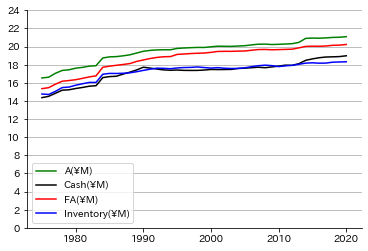

In [131]:
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.plot(np.log(DAT['A(¥M)']),label='A(¥M)',c='green')
plt.plot(np.log(DAT['Cash(¥M)']),label='Cash(¥M)',c='k')
plt.plot(np.log(DAT['FA(¥M)']),label='FA(¥M)',c='red')
plt.plot(np.log(DAT['Inventory(¥M)']),label='Inventory(¥M)',c='blue')
plt.yticks(np.arange(0, 25, step=2))
plt.grid(axis="y")
plt.legend()
plt.show()

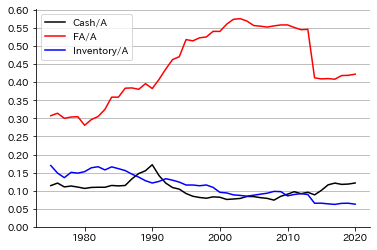

In [132]:
DAT['Cash/A']=DAT['Cash(¥M)']/DAT['A(¥M)']
DAT['FA/A']=DAT['FA(¥M)']/DAT['A(¥M)']
DAT['Inventory/A']=DAT['Inventory(¥M)']/DAT['A(¥M)']
for i in DAT.columns.tolist():
          DAT[i]=DAT[i].replace(0,np.nan)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.plot(DAT['Cash/A'],label='Cash/A',c='k')
plt.plot(DAT['FA/A'],label='FA/A',c='red')
plt.plot(DAT['Inventory/A'],label='Inventory/A',c='blue')
plt.yticks(np.arange(0, 0.65, step=0.05))
plt.grid(axis="y")
plt.legend()
plt.show()

# 証券コードと産業・業界の関係整理

[証券コードによる業種分類](https://ib-college.com/shiki-a/#st-toc-h-2)参照

In [133]:
SIC=pd.DataFrame(
          data={'Min': pd.Series([1300, 1500,1700,2000,3000,3700,4000,5000,5100,5200,5400,5700,5900,6000,6500,7000,7700,7800,8000,8300,8600,8700,8800,9000,9100,9200,9300,9400,9500,9600]),
                'Max': pd.Series([1500,1700,2000,3000,3600,4000,5000,5100,5200,5400,5700,5800,6000,6500,7000,7500,7800,8000,8300,8600,8700,8800,9000,9100,9200,9300,9400,9500,9600,10000]),
                'Industry': pd.Series(['水産・農林業','鉱業','建設業','食料品','繊維製品','パルプ・紙','化学・医薬品','石油・石炭製品','ゴム製品','ガラス・土石製品','鉄鋼','非鉄金属','金属製品','機械','電気機器','輸送用機器','機密機器','その他製品','卸売業','銀行・その他金融','証券・先物取引所','保険','不動産','陸運','海運','空運','倉庫・運輸関連','情報通信','電気ガス','サービス業']) }
)

# 各企業を産業別に分類し、各々の比率を図示

In [134]:
List=[]
for i in range(len(SIC)):
          Dat = dat[(SIC.iloc[i,0] <= dat['Stock Code']) & (dat['Stock Code'] < SIC.iloc[i,1])]
          listI=[Dat, SIC.iloc[i,2]]
          List.append(listI)

C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_12684\334315892.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_12684\334315892.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_12684\334315892.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_12684\334315892.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\IchiroKozakai\AppData\Local\Temp\ipykernel_12684\334315892.py:34: UserWarni

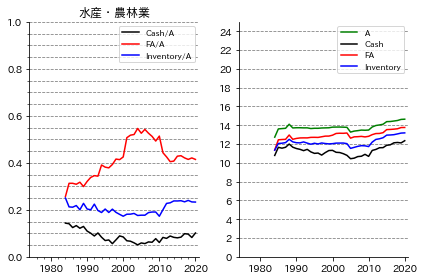

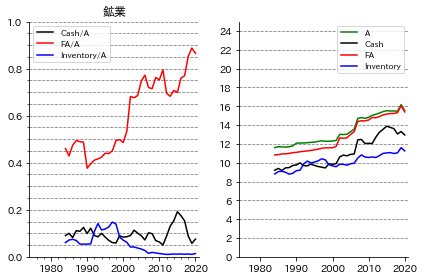

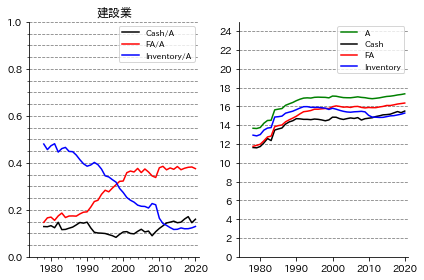

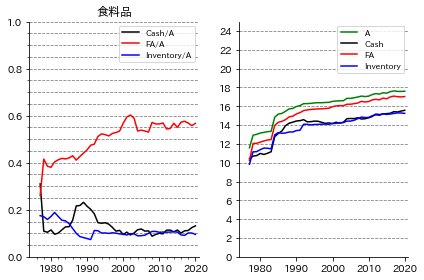

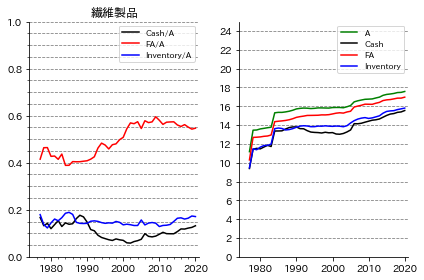

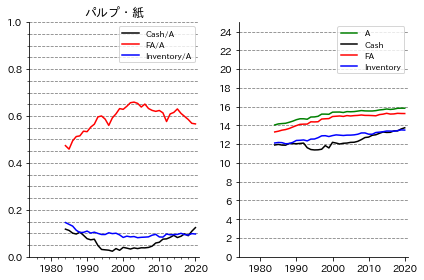

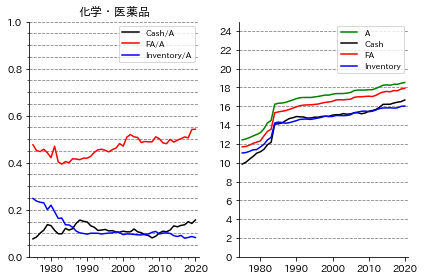

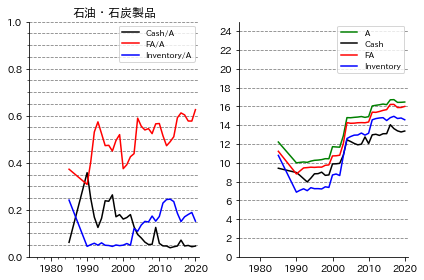

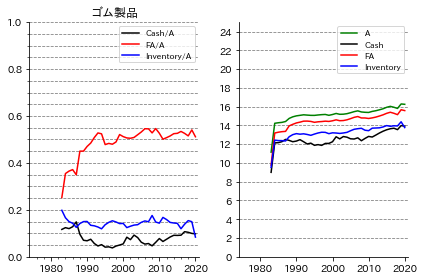

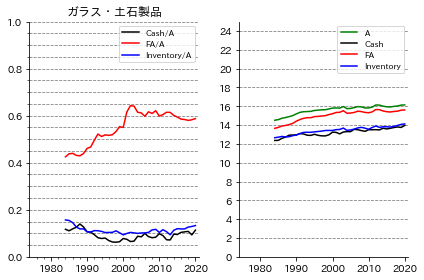

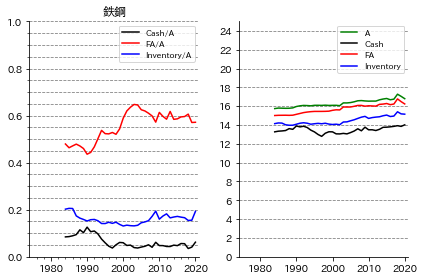

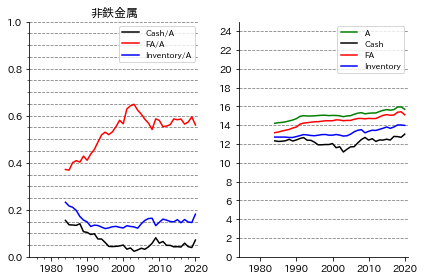

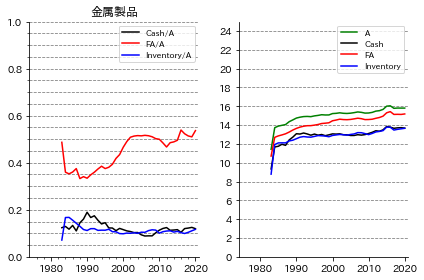

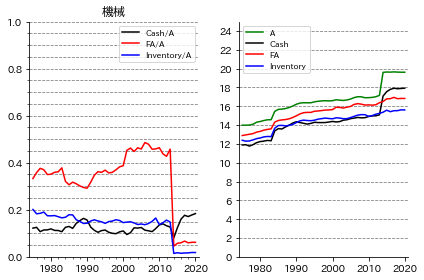

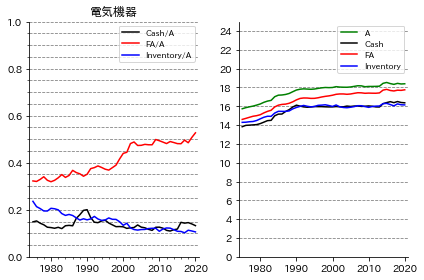

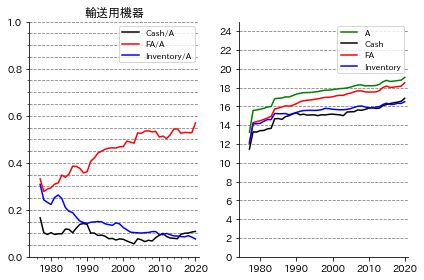

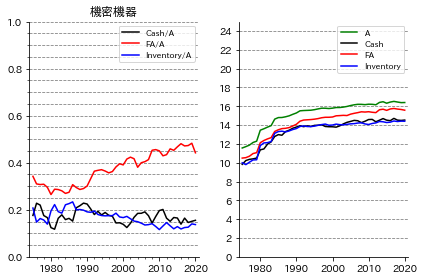

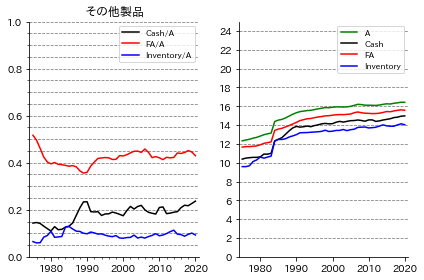

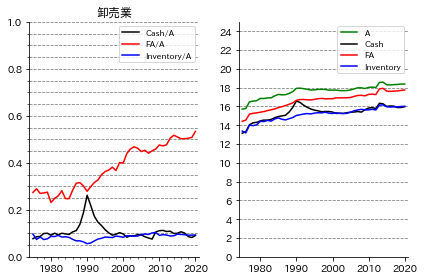

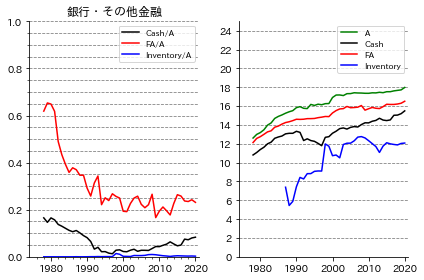

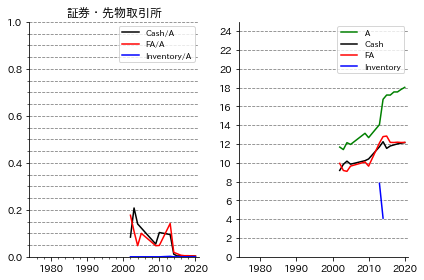

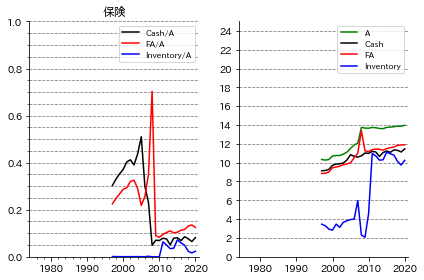

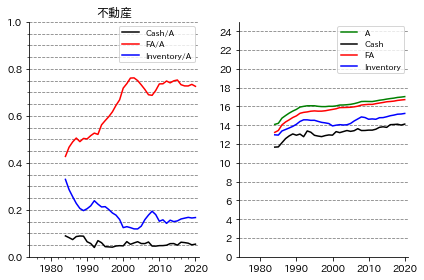

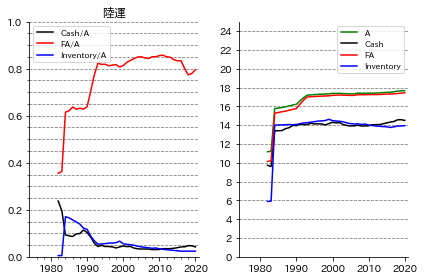

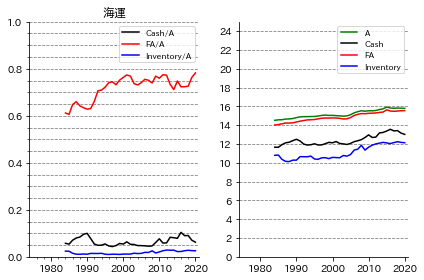

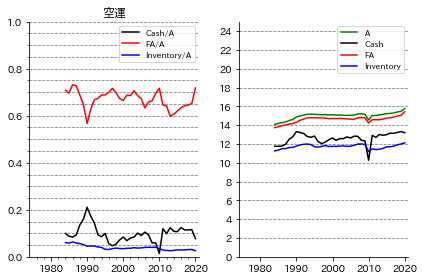

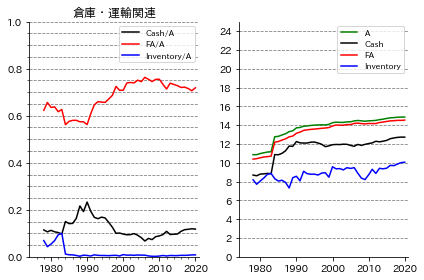

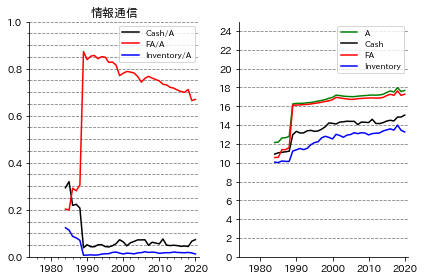

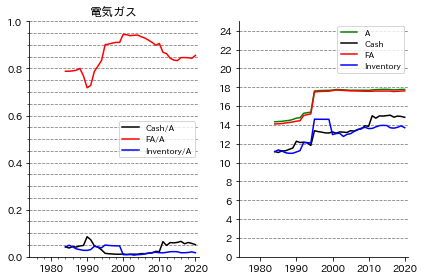

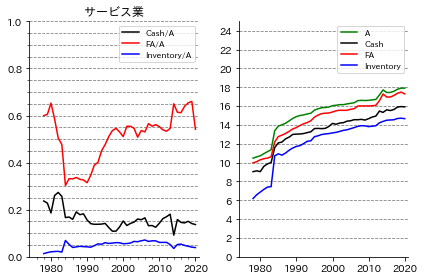

In [135]:
for j in range(len(List)):
          DF= List[j][0].groupby('FY').sum()
          DF['Cash/A']=DF['Cash(¥M)']/DF['A(¥M)']
          DF['FA/A']=DF['FA(¥M)']/DF['A(¥M)']
          DF['Inventory/A']=DF['Inventory(¥M)']/DF['A(¥M)']
          fig = plt.figure()
          ax1 = fig.add_subplot(1,2,1)
          ax1.set_title(str(List[j][1]))
          ax1.spines['right'].set_visible(False)
          ax1.spines['top'].set_visible(False)
          ax1.plot(DF['Cash/A'],label='Cash/A',c='k')
          ax1.plot(DF['FA/A'], label='FA/A',c='red')
          ax1.plot(DF['Inventory/A'], label='Inventory/A',c='blue')
          ax1.legend(fontsize='small')
          ax1.set_xlim(1974, 2021)
          ax1.set_ylim(0, 1)
          ax1.minorticks_on()
          ax1.grid(which = "both", axis="y", color = "gray", linestyle="--")


          ax2 = fig.add_subplot(1,2,2)
          ax2.spines['right'].set_visible(False)
          ax2.spines['top'].set_visible(False)
          ax2.plot(np.log(DF['A(¥M)']), label='A',c='green')
          ax2.plot(np.log(DF['Cash(¥M)']), label='Cash',c='k')
          ax2.plot(np.log(DF['FA(¥M)']),label='FA',c='red')
          ax2.plot(np.log(DF['Inventory(¥M)']), label='Inventory',c='blue')
          ax2.legend(fontsize='small')
          ax2.set_xlim(1974, 2021)
          ax2.set_ylim(0, 25)
          ax2.set_yticks(np.arange(0,25,2))
          ax2.grid(axis="y", color = "gray", linestyle="--")
          fig.tight_layout()
          fig.show()

# 各企業ごとの比率の平均値

Kahle and Stultz の分析手法

In [136]:
dat['Cash/A']=dat['Cash(¥M)']/dat['A(¥M)']
dat['FA/A']=dat['FA(¥M)']/dat['A(¥M)']
dat['Inventory/A']=dat['Inventory(¥M)']/dat['A(¥M)']
Dat=dat.groupby('FY').mean()

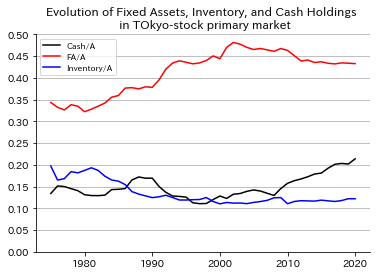

In [137]:
plt.title('Evolution of Fixed Assets, Inventory, and Cash Holdings \n in TOkyo-stock primary market')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.plot(Dat['Cash/A'],c='k',label='Cash/A')
plt.plot(Dat['FA/A'],c='red',label='FA/A')
plt.plot(Dat['Inventory/A'],c='blue',label='Inventory/A')
plt.yticks(np.arange(0, 0.55, 0.05))
plt.grid(axis="y")
plt.legend(fontsize='small')
plt.show()